<a href="https://colab.research.google.com/github/yousef-rezaei/Machine_Learning/blob/main/Emnist_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install Kaggle API
!pip install kaggle

from google.colab import files
files.upload()  # Upload your kaggle.json file manually


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yousefrezaeimirghaed","key":"dc938f1861954667079efc3a1a342b0b"}'}

In [2]:
# Move kaggle.json to correct location
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the EMNIST dataset
!kaggle datasets download -d crawford/emnist

# Unzip dataset
!unzip emnist.zip -d dataset


Dataset URL: https://www.kaggle.com/datasets/crawford/emnist
License(s): CC0-1.0
Archive:  emnist.zip
  inflating: dataset/emnist-balanced-mapping.txt  
  inflating: dataset/emnist-balanced-test.csv  
  inflating: dataset/emnist-balanced-train.csv  
  inflating: dataset/emnist-byclass-mapping.txt  
  inflating: dataset/emnist-byclass-test.csv  
  inflating: dataset/emnist-byclass-train.csv  
  inflating: dataset/emnist-bymerge-mapping.txt  
  inflating: dataset/emnist-bymerge-test.csv  
  inflating: dataset/emnist-bymerge-train.csv  
  inflating: dataset/emnist-digits-mapping.txt  
  inflating: dataset/emnist-digits-test.csv  
  inflating: dataset/emnist-digits-train.csv  
  inflating: dataset/emnist-letters-mapping.txt  
  inflating: dataset/emnist-letters-test.csv  
  inflating: dataset/emnist-letters-train.csv  
  inflating: dataset/emnist-mnist-mapping.txt  
  inflating: dataset/emnist-mnist-test.csv  
  inflating: dataset/emnist-mnist-train.csv  
  inflating: dataset/emnist_source

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical


In [4]:
# Load the training and testing datasets
train_df = pd.read_csv('/content/dataset/emnist-balanced-train.csv', header=None)
test_df = pd.read_csv('/content/dataset/emnist-balanced-test.csv', header=None)

print(f"Train shape: {train_df.shape}")
print(f"Test shape: {test_df.shape}")


Train shape: (112800, 785)
Test shape: (18800, 785)


In [5]:
# Separate labels and images
y_train = train_df.iloc[:, 0].values
X_train = train_df.iloc[:, 1:].values

y_test = test_df.iloc[:, 0].values
X_test = test_df.iloc[:, 1:].values

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (112800, 784), y_train shape: (112800,)
X_test shape: (18800, 784), y_test shape: (18800,)


In [6]:
# Normalize pixel values
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape for CNN (28x28x1 images)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print(f"Number of classes: {num_classes}")


Number of classes: 47


In [7]:
# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [10]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=128,
    validation_split=0.1
)


Epoch 1/30
794/794 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5798 - loss: 1.4960 - val_accuracy: 0.8307 - val_loss: 0.5124
Epoch 2/30
794/794 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8245 - loss: 0.5280 - val_accuracy: 0.8506 - val_loss: 0.4292
Epoch 3/30
794/794 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8489 - loss: 0.4457 - val_accuracy: 0.8625 - val_loss: 0.3858
Epoch 4/30
794/794 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8582 - loss: 0.4046 - val_accuracy: 0.8657 - val_loss: 0.3754
Epoch 5/30
794/794 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8676 - loss: 0.3753 - val_accuracy: 0.8696 - val_loss: 0.3569
Epoch 6/30
794/794 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8729 - loss: 0.3529 - val_accuracy: 0.8756 - val_loss: 0.3440
Epoch 7/30
794/794 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8782 - loss: 0.3302 - val_accuracy: 0.8748 - val_loss: 0.3428
Epoch 8/30
794/794 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8847 - loss: 0.3181 - val_accuracy: 

588/588 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8818 - loss: 0.3709

Test Accuracy: 0.8821


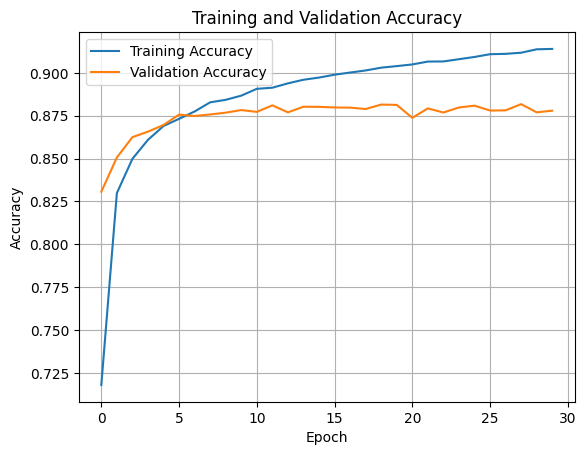

In [11]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Plot training vs validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


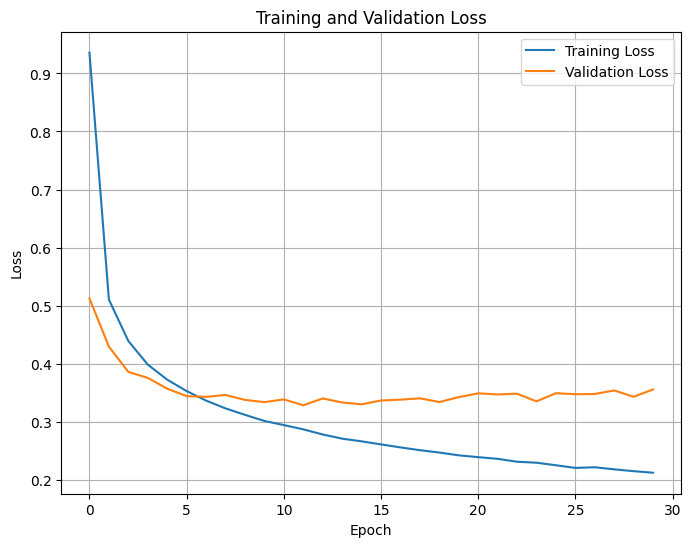

In [13]:
# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


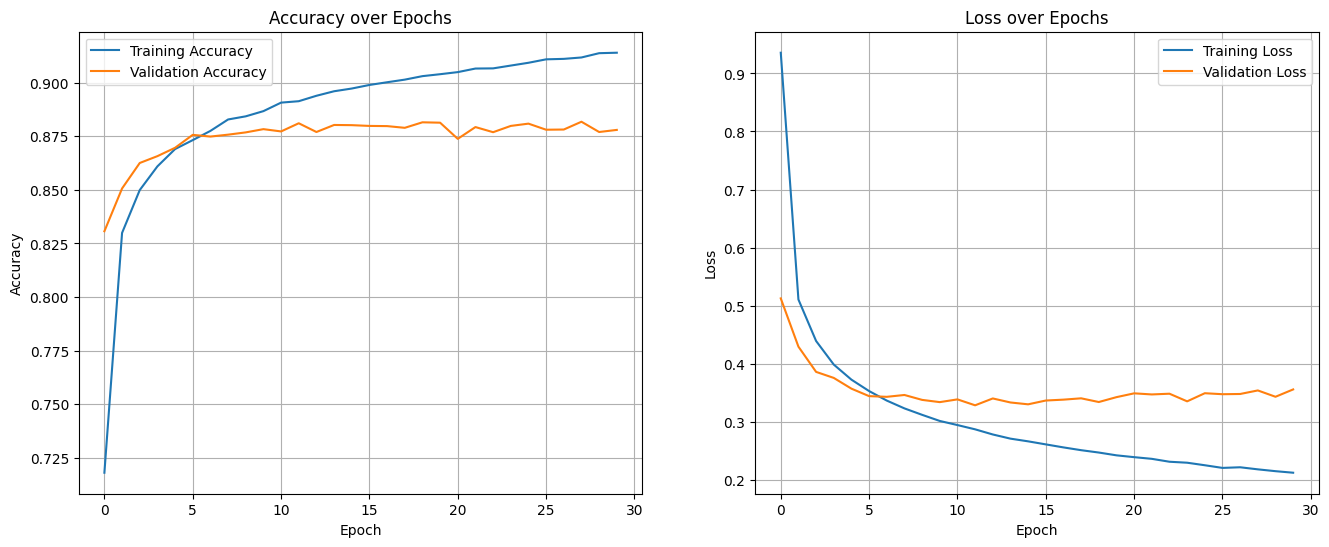

In [14]:
# Plot combined accuracy and loss in two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Accuracy subplot
ax1.plot(history.history['accuracy'], label='Training Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Accuracy over Epochs')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)

# Loss subplot
ax2.plot(history.history['loss'], label='Training Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Loss over Epochs')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)

plt.show()
